# **PREPROCESSING**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [24]:
def preprocessing(df):
    """Initial data preprocessing"""
    
    # Column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df['magnitude'] = df['magnitue']
    df = df.drop(['magnitue'], axis=1)

    # Organize label columns
    #     label           2 categories (binary): 0: BenignTraffic, 1: Attack
    #     attack_cat      8 categories: Bening, DDoS, DoS, Recon, Mirai, Web-based, Spoofing, Brute Force
    #     attack_type     34 categories: Benign and 33 attacks
    df.rename(columns={'label': 'attack_type', 'grouped_label': 'attack_cat'}, inplace=True)
    df.replace({'attack_cat': {'BenignTraffic': 'Benign'}, 'attack_type': {'BenignTraffic': 'Benign'}}, inplace=True)
    df['label'] = df['attack_cat'].apply(lambda x: 0 if x == 'Benign' else 1)

    # Convert categorical labels to numerical labels
    label_encoder = LabelEncoder()
    df["attack_cat"] = label_encoder.fit_transform(df["attack_cat"])
    
    unique_attacks = ['Benign'] + sorted(set(df["attack_type"]) - {"Benign"})
    attack_type_mapping = {attack: idx for idx, attack in enumerate(unique_attacks)}
    df["attack_type"] = df["attack_type"].map(attack_type_mapping)

    return df

In [25]:
def LabelEncoding(df_initial, df_encoded):
    """Generate an additional DataFrame with the numerical codification of the labels"""
    
    # Extract attack categories and types (names)
    names = df_initial[['grouped_label', 'label']].value_counts().reset_index()
    names.columns = ['grouped_label', 'label', 'count']
    names['label'] = names['label'].replace('BenignTraffic', 'Benign')
    attack_cat_names = ['Benign'] + sorted(set(names['grouped_label']) - {'Benign'})
    attack_type_names = ['Benign'] + sorted(set(names['label']) - {'Benign'})

    # Extract numerical codification for attack categories and types
    attack_cat_mapping = {name: idx for idx, name in enumerate(attack_cat_names)}
    attack_type_mapping = {name: idx for idx, name in enumerate(attack_type_names)}

    names['attack_cat_num'] = names['grouped_label'].map(attack_cat_mapping)
    names['attack_type_num'] = names['label'].map(attack_type_mapping)

    df_labels = names[['grouped_label', 'attack_cat_num', 'label', 'attack_type_num', 'count']].drop_duplicates()

    return df_labels.rename(columns={'grouped_label': 'attack_cat_name', 'label': 'attack_type_name'})

In [26]:
def FullAttackTypeDistribution(df_labels):
    """Plot showing the amount of samples per attack type"""
    
    df_attacks = df_labels[df_labels['attack_cat_name'] != 'Benign']
    df_attacks = df_attacks.sort_values(by=['count', 'attack_type_name'], ascending=[False, True])

    categories = ['DDoS', 'Recon', 'Spoofing', 'Mirai', 'DoS', 'Brute Force', 'Web-based']
    palette = sns.color_palette("twilight_shifted", len(categories))
    color_map = dict(zip(categories, palette))
    colors_attack = [color_map[g] for g in df_attacks["attack_cat_name"]]
    
    
    plt.figure(figsize=(12, 10))
    plt.barh(df_attacks['attack_type_name'],df_attacks['count'], color=colors_attack)
    plt.xlabel('Count')
    plt.ylabel('Attack Type')
    plt.title('Attack Category Distribution')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[g]) for g in categories]
    plt.legend(handles, categories, title="Attack Category", loc="lower right")
    plt.show()

In [27]:
def FullAttackCategoryDistribution(df_labels):
    """Plot showing the amount of samples per attack category: DDoS, Dos, Brute Force, Spoofing, Recon, Web-based, Mirai"""
    
    df_attacks = df_labels[df_labels['attack_cat_name'] != 'Benign']
    df_cat = df_attacks.groupby('attack_cat_name')['count'].sum().reset_index().sort_values('count', ascending=False)
    
    plt.figure(figsize=(12, 10))
    plt.barh(df_cat['attack_cat_name'],df_cat['count'], color='black')
    plt.xlabel('Count')
    plt.ylabel('Attack Category')
    plt.title('Attack Type Distribution')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

In [28]:
# df_initial = pd.read_csv("/kaggle/input/equitative-dataset/EquitativeDataset.csv").dropna()
df_initial = pd.read_csv("..\\datasets\\EquitativeDataset.csv").dropna()

In [29]:
df = preprocessing(df_initial)

Generate a DataFrame containing all the numerical codifications of each label

In [30]:
df_labels = LabelEncoding(df_initial, df)
df_labels.to_csv("..\\datasets\\df_labels.csv",index=False)
df_labels

,attack_cat_name,attack_cat_num,attack_type_name,attack_type_num,count
0,Benign,0,Benign,0,1098195
1,DDoS,2,DDoS-ACK_Fragmentation,4,37000
2,DDoS,2,DDoS-ICMP_Flood,6,37000
3,DDoS,2,DDoS-ICMP_Fragmentation,7,37000
4,DDoS,2,DDoS-PSHACK_Flood,8,37000
5,DDoS,2,DDoS-RSTFINFlood,9,37000
6,DDoS,2,DDoS-SYN_Flood,10,37000
7,DDoS,2,DDoS-SynonymousIP_Flood,12,37000
8,DDoS,2,DDoS-TCP_Flood,13,37000
9,DDoS,2,DDoS-UDP_Flood,14,37000


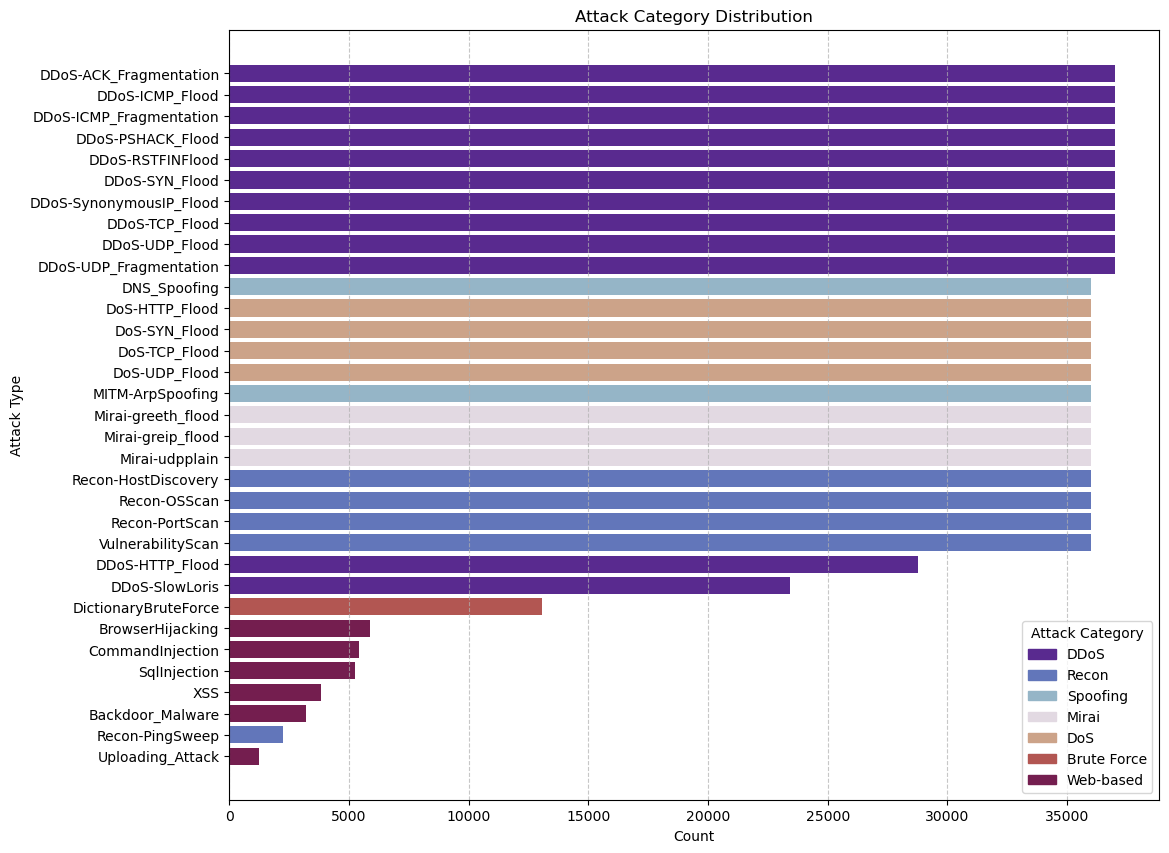

In [31]:
FullAttackTypeDistribution(df_labels)

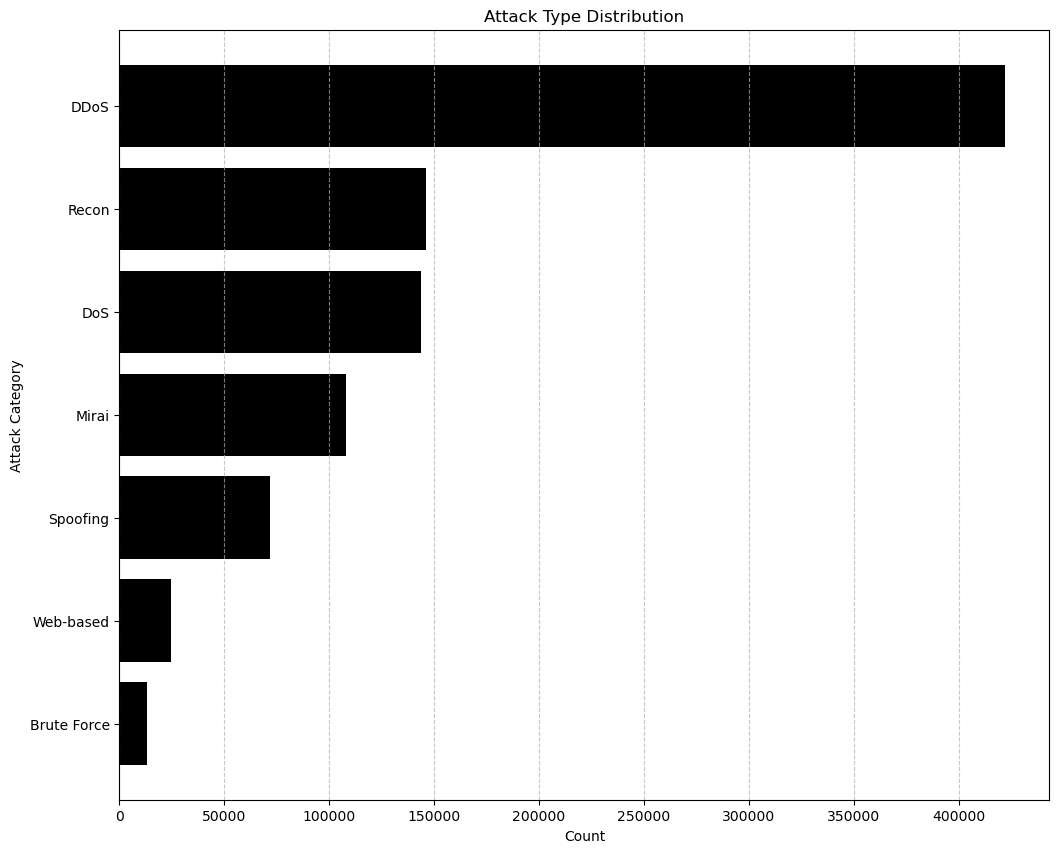

In [32]:
FullAttackCategoryDistribution(df_labels)

## **STANDARDIZATION**

In [33]:
def ScaleData(df):
    """ Normalize data features to ensure each has Mean = 0 and Standard Deviation = 1"""
    
    df_scaled = StandardScaler().fit_transform(df)
    return pd.DataFrame(df_scaled, columns=df.columns) 

In [34]:
df_scaled = ScaleData(df)

## **FEATURE SELECTION**

In [35]:
RFE_DT = {'label': ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'syn_flag_number', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'ssh', 'tcp', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'radius', 'covariance', 'variance', 'weight', 'magnitude'], 
          'attack_cat': ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'ssh', 'tcp', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number', 'radius', 'covariance', 'variance', 'weight', 'magnitude'], 
          'attack_type': ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'fin_flag_number', 'syn_flag_number', 'psh_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'icmp', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number', 'radius', 'covariance', 'variance', 'weight', 'magnitude']}

RFC_RF = {'label': ['rst_count', 'iat', 'urg_count', 'header_length', 'flow_duration', 'https', 'variance', 'duration', 'number', 'magnitude', 'weight', 'ack_flag_number', 'avg', 'rate', 'std', 'srate', 'tot_size', 'radius', 'protocol_type', 'tot_sum', 'max', 'fin_count', 'min', 'covariance', 'syn_count', 'ack_count', 'tcp', 'http', 'udp', 'syn_flag_number'], 
          'attack_cat': ['iat', 'rst_count', 'flow_duration', 'urg_count', 'header_length', 'min', 'avg', 'duration', 'number', 'weight', 'magnitude', 'protocol_type', 'tot_size', 'max', 'tot_sum', 'https', 'variance', 'srate', 'rate', 'std', 'radius', 'syn_count', 'covariance', 'ack_count', 'fin_count', 'http', 'ack_flag_number', 'tcp', 'udp', 'icmp'], 
          'attack_type': ['iat', 'rst_count', 'urg_count', 'header_length', 'flow_duration', 'protocol_type', 'tot_size', 'magnitude', 'avg', 'max', 'syn_count', 'variance', 'tot_sum', 'min', 'srate', 'rate', 'duration', 'https', 'ack_count', 'weight', 'covariance', 'ack_flag_number', 'radius', 'std', 'fin_count', 'number', 'icmp', 'syn_flag_number', 'psh_flag_number', 'fin_flag_number']}

RFC_RF = {'label': ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'tcp', 'udp', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number', 'radius', 'covariance', 'variance', 'weight', 'magnitude'], 
          'attack_cat': ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'tcp', 'udp', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number', 'radius', 'covariance', 'variance', 'weight', 'magnitude'], 
          'attack_type': ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'fin_flag_number', 'syn_flag_number', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'https', 'icmp', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number', 'radius', 'covariance', 'variance', 'weight', 'magnitude']}

techniques = [RFE_DT, RFC_RF, RFC_RF]

In [36]:
from collections import Counter

def find_duplicates_across_lists(lists):
    all_elements = [item for sublist in lists for item in sublist]
    counts = Counter(all_elements)
    return [item for item, count in counts.items() if count == 3]

duplicates_key = {}
for key in list(techniques[0].keys()):
    key_lists = [technique[key] for technique in techniques]
    duplicates_key[key] = find_duplicates_across_lists(key_lists)

    print(f"Duplicates found across '{key}':\n {duplicates_key[key]}\n\n")


print()

duplicates_within_lists = []
for key, duplicates in duplicates_key.items():
    duplicates_within_lists.append(duplicates)
duplicates_full = find_duplicates_across_lists(duplicates_within_lists)
print(f"There are {len(duplicates_full)} duplicates overall:\n {duplicates_full}")

Duplicates found across 'label':
 ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'tcp', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'radius', 'covariance', 'variance', 'weight', 'magnitude']


Duplicates found across 'attack_cat':
 ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'tcp', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number', 'radius', 'covariance', 'variance', 'weight', 'magnitude']


Duplicates found across 'attack_type':
 ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'fin_flag_number', 'syn_flag_number', 'psh_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'https', 'icmp', 'to

In [37]:
less_important_features = []
for feature in df.columns:
    if feature not in duplicates_full and feature not in ['attack_type', 'attack_cat', 'label']:
        less_important_features.append(feature)

print(f"Discarded features {(len(df.columns)-3-len(duplicates_full))}:\n {less_important_features}")

Discarded features 21:
 ['drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'http', 'dns', 'telnet', 'smtp', 'ssh', 'irc', 'tcp', 'udp', 'dhcp', 'arp', 'icmp', 'ipv', 'llc', 'number']


In [38]:
df = df.drop(columns=less_important_features)

# **DATA PARTITIONS**

In [39]:
def AttackTypeDistribution(partitions, nodes, df_labels):
    """For each node in the environment, plot showing the amount of samples per attack type"""
    
    for i in range(nodes):
        df_part = partitions[f"part_{i}"] if nodes > 1 else partitions
    
        df_merged = df_part.merge(df_labels[['attack_type_num', 'attack_type_name', 'attack_cat_name']],
                                  left_on='attack_type', right_on='attack_type_num', how='left')
    
        # Filter out Benign attack categories for visualization and assign colors to each attack category
        df_attacks = df_merged[df_merged['attack_cat_name'] != 'Benign']
        
        categories = ['DDoS', 'Recon', 'Spoofing', 'Mirai', 'DoS', 'Brute Force', 'Web-based']
        palette = sns.color_palette("twilight_shifted", len(categories))
        color_map = dict(zip(categories, palette))
        colors_attack = [color_map[g] for g in df_attacks["attack_cat_name"]]
        
        # Count the occurrences of each 'attack_type' in the partition
        attack_counts = df_attacks[['attack_cat_name', 'attack_type_name']].value_counts().reset_index(name='count')
        attack_counts = attack_counts.sort_values(by=['count', 'attack_type_name'], ascending=[False, True])
        
        # Create a bar plot
        plt.figure(figsize=(12, 8))
        plt.barh(attack_counts['attack_type_name'], attack_counts['count'], color=[color_map[cat] for cat in attack_counts['attack_cat_name']])
        if nodes > 1 :
           plt.title(f"Attacks Distribution in Node {i}")
        else: 
            plt.title("Attacks distribution in the Test Dataset")
        plt.ylabel("Attack Type")
        plt.xlabel("Count")
        
        plt.gca().invert_yaxis()  # Highest count on top
        plt.grid(axis='x', linestyle='--', alpha=0.7)
    
        # Create legend
        handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[g]) for g in categories]
        plt.legend(handles, categories, title="Attack Category", loc="lower right")
        
        plt.tight_layout()
        plt.show()

In [40]:
def AttackCategoryDistribution(partitions, nodes, df_labels):
    """For each node in the environment, plot showing the amount of samples per attack category and benign traffic"""
    
    fig, axes = plt.subplots(1, nodes, figsize=(18, 6))
    if nodes == 1:
        axes = [axes]
        
    for i in range(nodes):
        df_part = partitions[f"part_{i}"] if nodes > 1 else partitions
        
        attack_counts = df_part['attack_cat'].value_counts().reset_index(name='count')
        attack_counts = attack_counts.merge(df_labels[['attack_cat_num', 'attack_cat_name']], left_on='attack_cat', right_on='attack_cat_num', how='left')
        attack_counts = attack_counts.drop_duplicates(subset=['attack_cat_name'])
        
        attack_counts['percentage'] = (attack_counts['count'] / attack_counts['count'].sum()) * 100
        ax = axes[i]
        bars = ax.barh(attack_counts['attack_cat_name'], attack_counts['count'], color='grey')

        for bar, count, percentage in zip(bars, attack_counts['count'], attack_counts['percentage']):
            yval = bar.get_width() 
            if yval < 100000:
                ax.text(yval + 0.1*yval, bar.get_y() + bar.get_height() / 2, f'{count} ({percentage:.2f}%)', ha='left', va='center', color='black', fontsize=10, fontweight='bold')
            else:
                ax.text(yval - 0.1*yval, bar.get_y() + bar.get_height() / 2, f'{count} ({percentage:.2f}%)', ha='right', va='center', color='black', fontsize=10, fontweight='bold')

        if nodes > 1:
            ax.set_title(f"Attack's category Distribution in Node {i}")
        else:
            ax.set_title("Attack's category Distribution in the Test Dataset")
        ax.set_ylabel("Traffic Category")
        ax.set_xlabel("Count")
        ax.invert_yaxis()
        ax.grid(axis='x', linestyle='--', alpha=0.7)
        
    plt.tight_layout()
    plt.show()

In [41]:
def TrafficDistribution(partitions, nodes):
    """For each node in the environment, plot showing the amount of attack and bening traffic samples"""
    
    fig, axes = plt.subplots(1, nodes, figsize=(18, 6))
    if nodes == 1:
        axes = [axes]
        
    for i in range(nodes):
        df_part = partitions[f"part_{i}"] if nodes > 1 else partitions
        
        attack_counts = df_part['label'].value_counts().reset_index(name='count')
        attack_counts['label'] = attack_counts['label'].apply(lambda x: 'Benign' if x == 0 else 'Attack')

        attack_counts['percentage'] = (attack_counts['count'] / attack_counts['count'].sum()) * 100
        
        ax = axes[i]
        bars = ax.bar(attack_counts['label'], attack_counts['count'], color='black')
        for bar, percentage in zip(bars, attack_counts['percentage']):
            yval = bar.get_height() 
            ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{percentage:.2f}%', ha='center', va='center', color='white', fontsize=18, fontweight='bold')

        if nodes > 1:
            ax.set_title(f"Attack Distribution in Node {i}")
        else:
            ax.set_title("Attack Distribution in the Test Dataset")
        ax.set_xlabel("Traffic Type")
        ax.set_ylabel("Count")
        
    plt.tight_layout()
    plt.show()

## **SPLIT TEST DATA**

In [42]:
def StratifiedSampling(df, label_col, fraction, random_state=42):
    """Groups the DataFrame 'df' by the label 'label_col' and samples 'fraction' of data from each group, ensuring the same category distribution"""
    
    df_grouped = df.groupby(label_col)
    return df_grouped.sample(frac=fraction, random_state=random_state)

In [43]:
# Split into Train + Validation (90%) and Test (10%)
df_test = StratifiedSampling(df, label_col='attack_type', fraction=0.1) # Select 10% of each attack type 
df_train_val = df.drop(df_test.index)

print(f"The Test Dataset contains {len(df_test)} samples ({(len(df_test)/len(df))*100:.2f}% of the dataset).")

df_test.to_csv("..\\datasets\\df_test.csv",index=False) # Save it 

The Test Dataset contains 202857 samples (10.00% of the dataset).


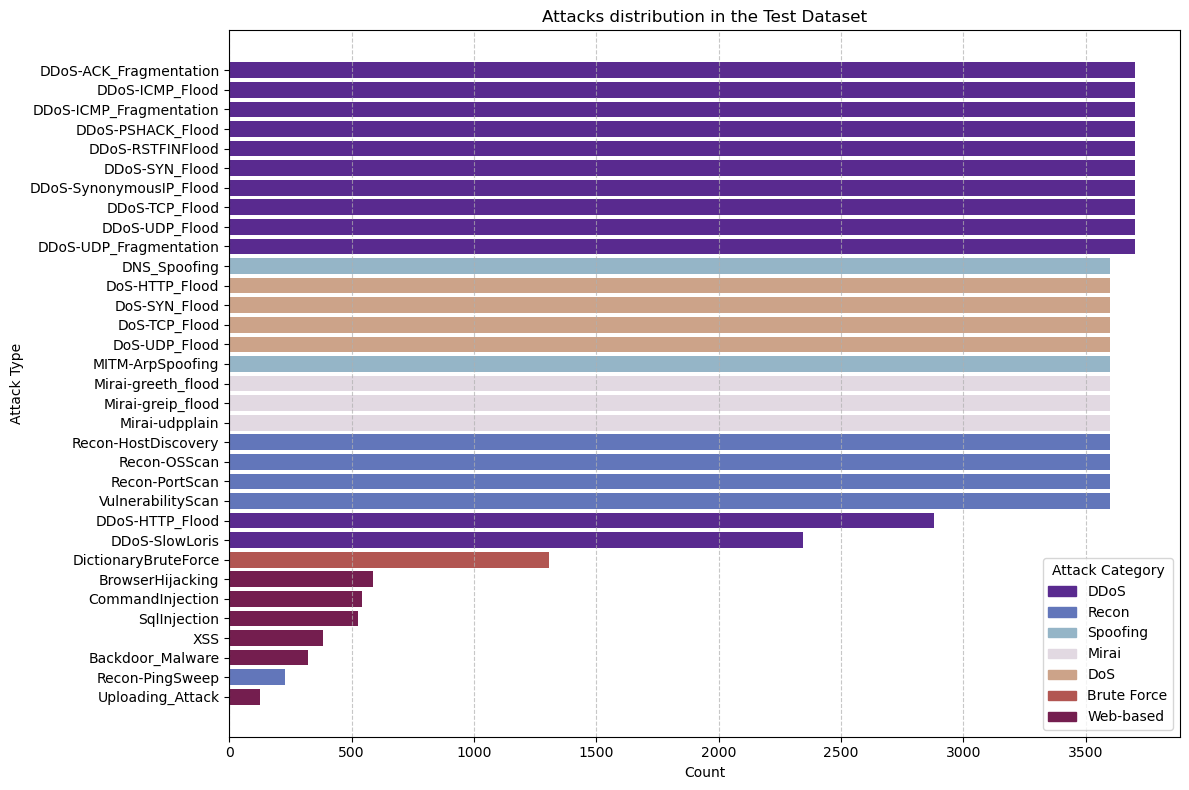

In [44]:
AttackTypeDistribution(df_test, 1, df_labels)

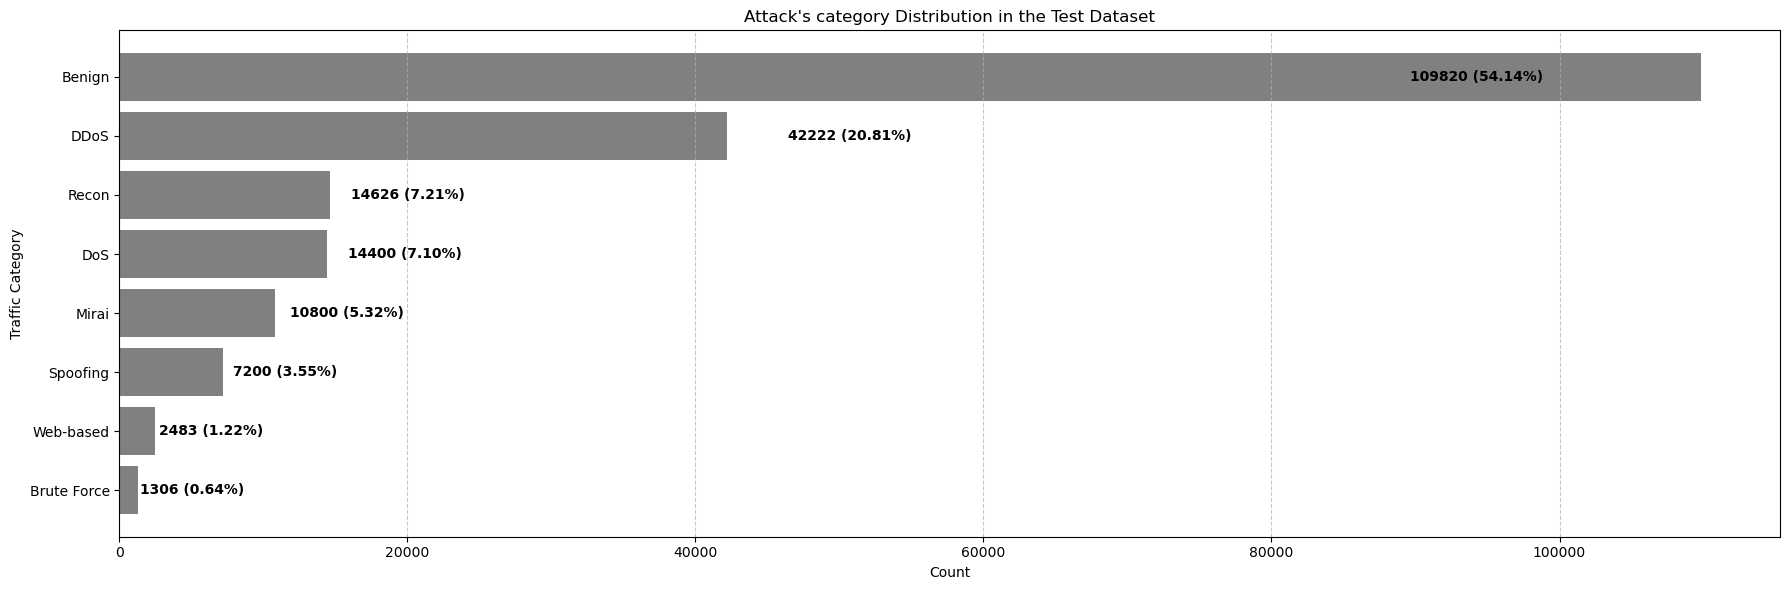

In [45]:
AttackCategoryDistribution(df_test, 1, df_labels)

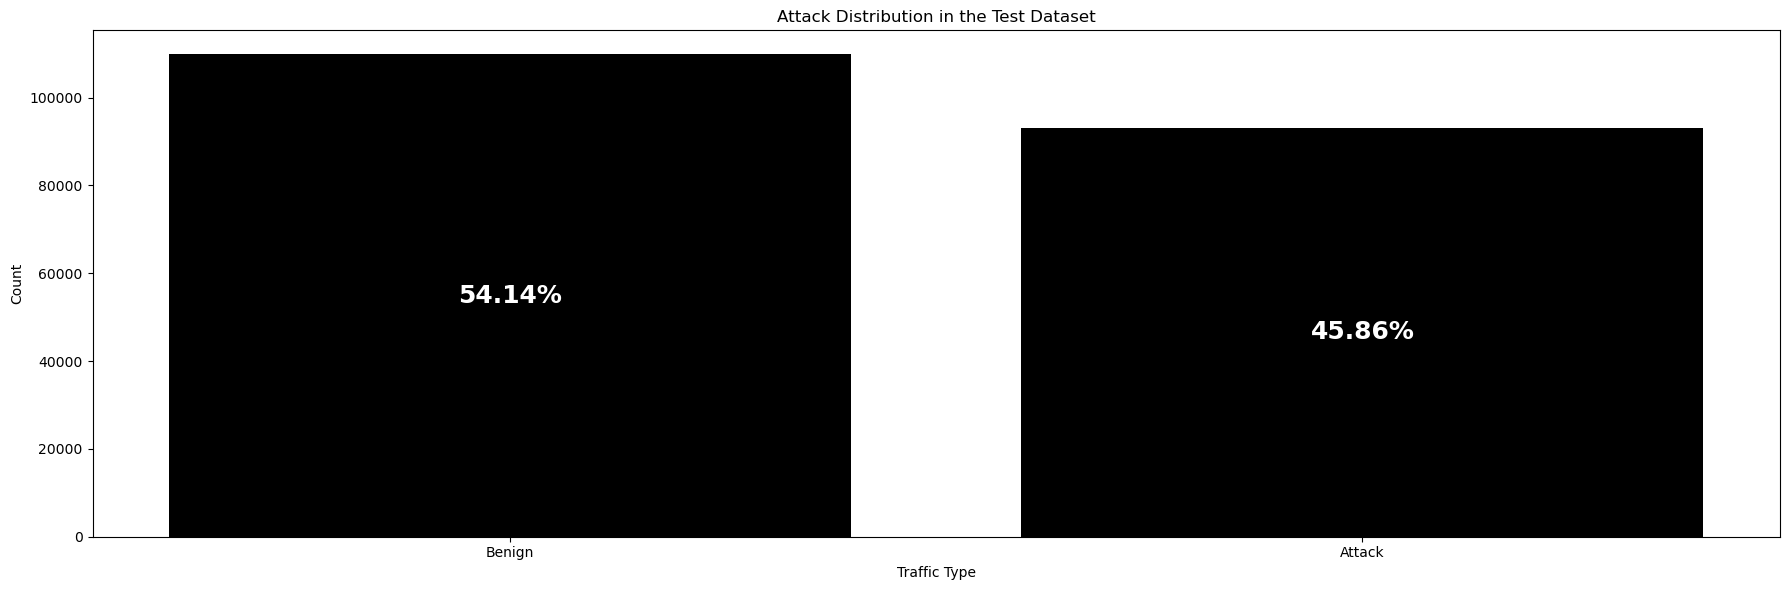

In [46]:
TrafficDistribution(df_test, 1)

## **UNIFORM PARTITIONS**

In [47]:
def AttackEquitativePartitions(df, categories, nodes, random_state=42):
    """Divides the DataFrame 'df' into a specified number of nodes ensuring the same amount of samples of 'categories' in each one"""
    
    np.random.seed(random_state) # For reproducibility
    partitions = {f"part_{i}": [] for i in range(nodes)} # Dictionary to store partitions

    # Shuffle the dataset to ensure randomness
    df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Distribute attack samples
    for idx, attack_category in enumerate(categories):
        df_cat = df[df['attack_cat'] == attack_category] # Filter by attack category
        
        for attack in df_cat['attack_type'].unique():
            df_attack = df_cat[df_cat['attack_type'] == attack] # Filter by attack type
            df_attack = df_attack.sample(frac=1, random_state=random_state).reset_index(drop=True)  # Shuffle
            
            num_samples = len(df_attack)
            samples_per_node = num_samples // nodes

            for i in range(nodes):
                start_idx = i * samples_per_node
                end_idx = (start_idx + samples_per_node) if i < (nodes - 1) else num_samples  # Last node gets remaining data
                partitions[f"part_{i}"].append(df_attack.iloc[start_idx:end_idx])

    
    # Distribute Benign samples 
    df_benign = df[df['attack_cat'] == 'Benign'].sample(frac=1, random_state=random_state).reset_index(drop=True)  # Shuffle
    num_benign = len(df_benign)
    benign_per_node = num_benign // nodes
    
    for i in range(nodes):
        start_idx = i * benign_per_node
        end_idx = start_idx + benign_per_node if i < nodes - 1 else num_benign  # Last node gets remaining data
        partitions[f"part_{i}"].append(df_benign.iloc[start_idx:end_idx])

    
    # Concatenate all parts per node
    for i in range(nodes):
        partitions[f"part_{i}"] = pd.concat(partitions[f"part_{i}"], ignore_index=True)

    return partitions

In [48]:
nodes = 3
partitions_eq3 = AttackEquitativePartitions(df_train_val, df_train_val[df_train_val['attack_cat'] != 'Benign']['attack_cat'].unique(), nodes)

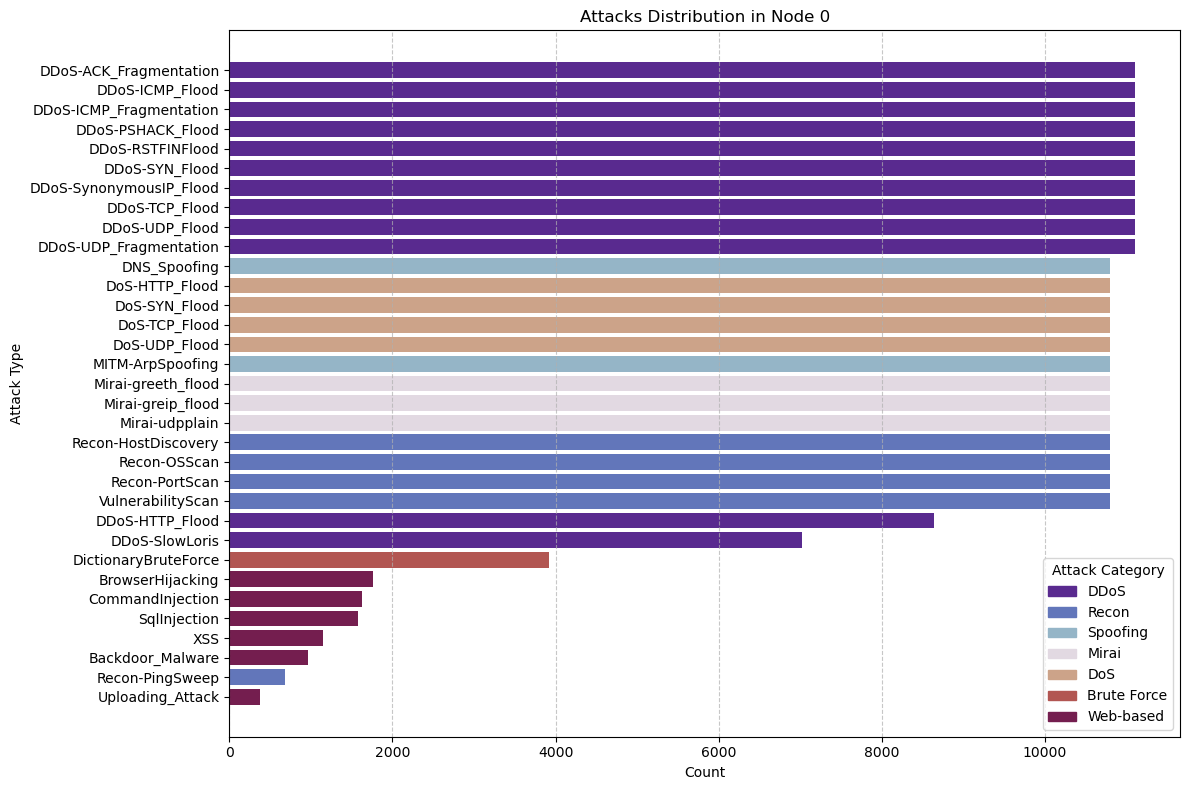

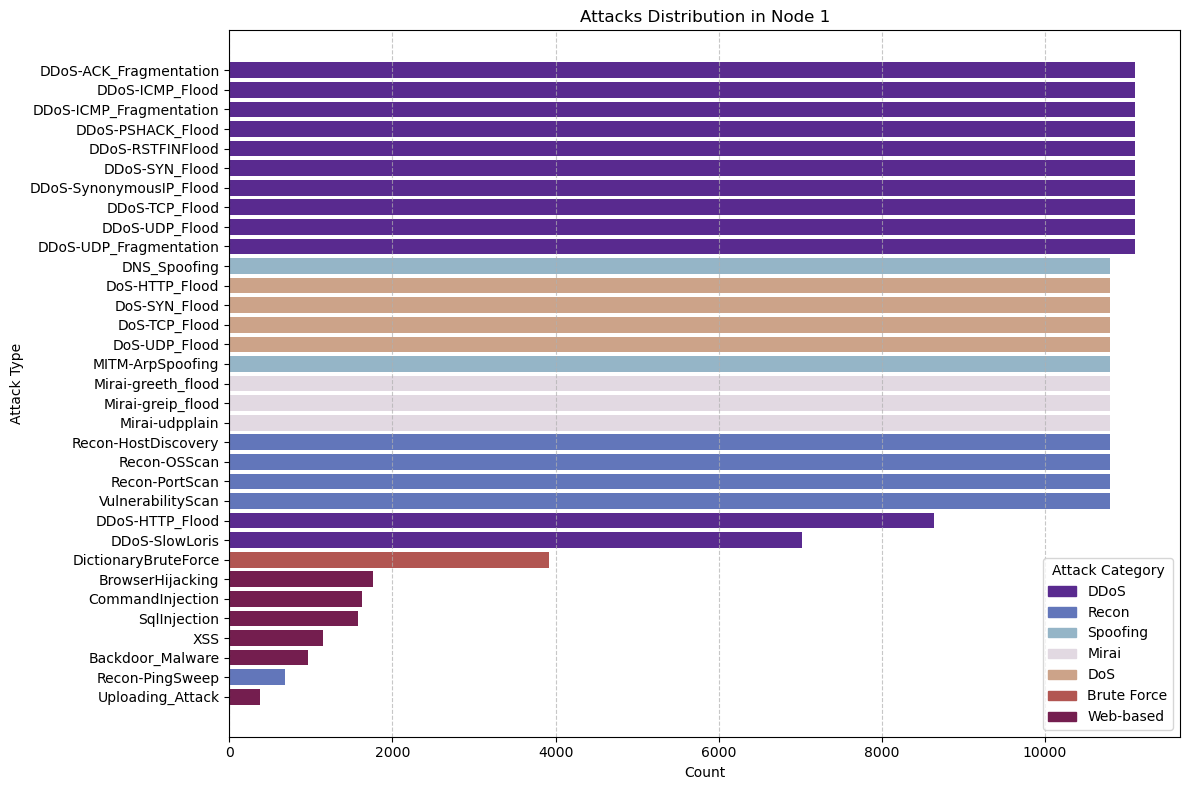

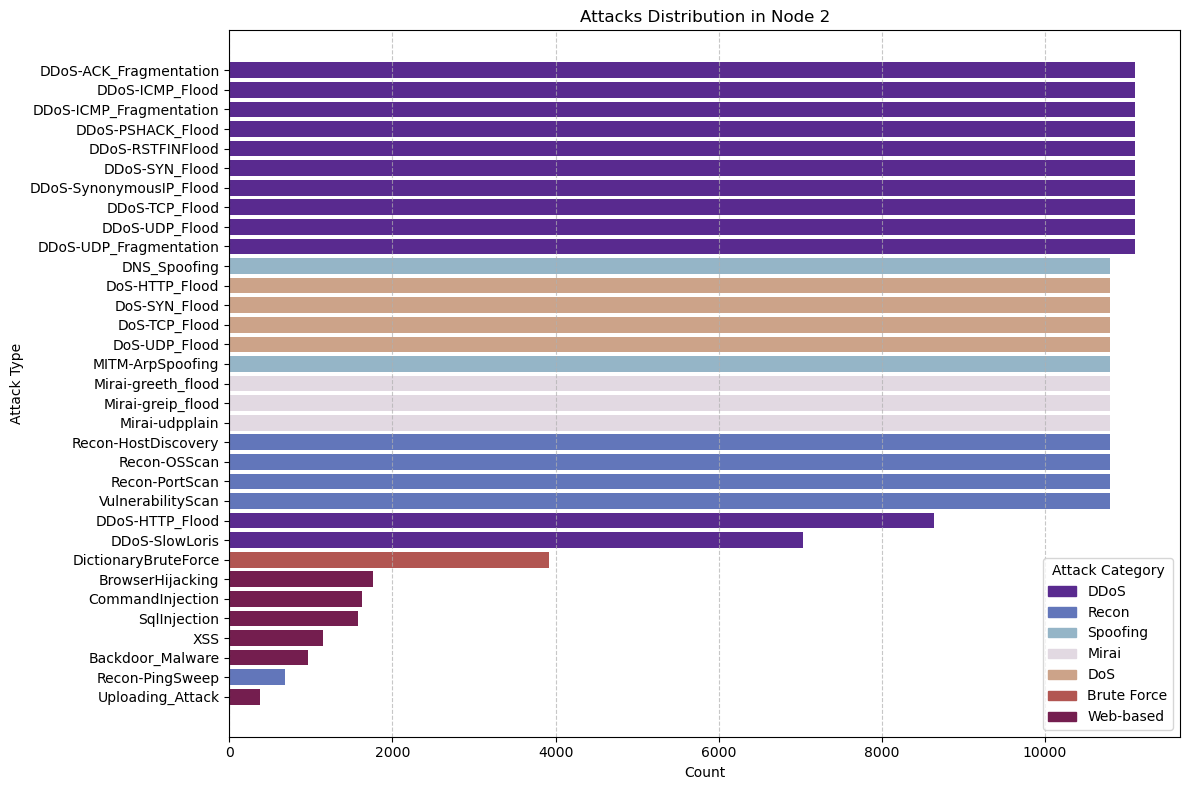

In [50]:
AttackTypeDistribution(partitions_eq3, nodes, df_labels)

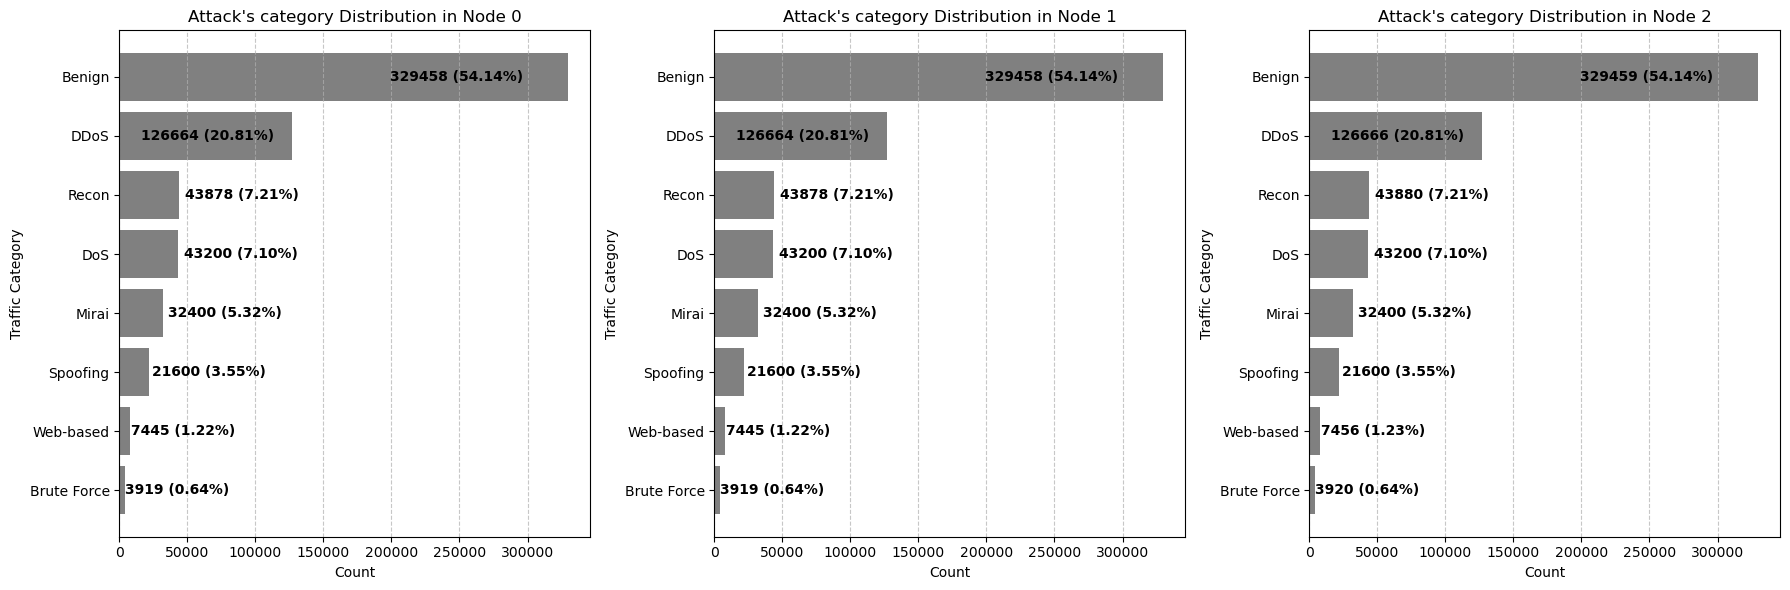

In [51]:
AttackCategoryDistribution(partitions_eq3, nodes, df_labels)

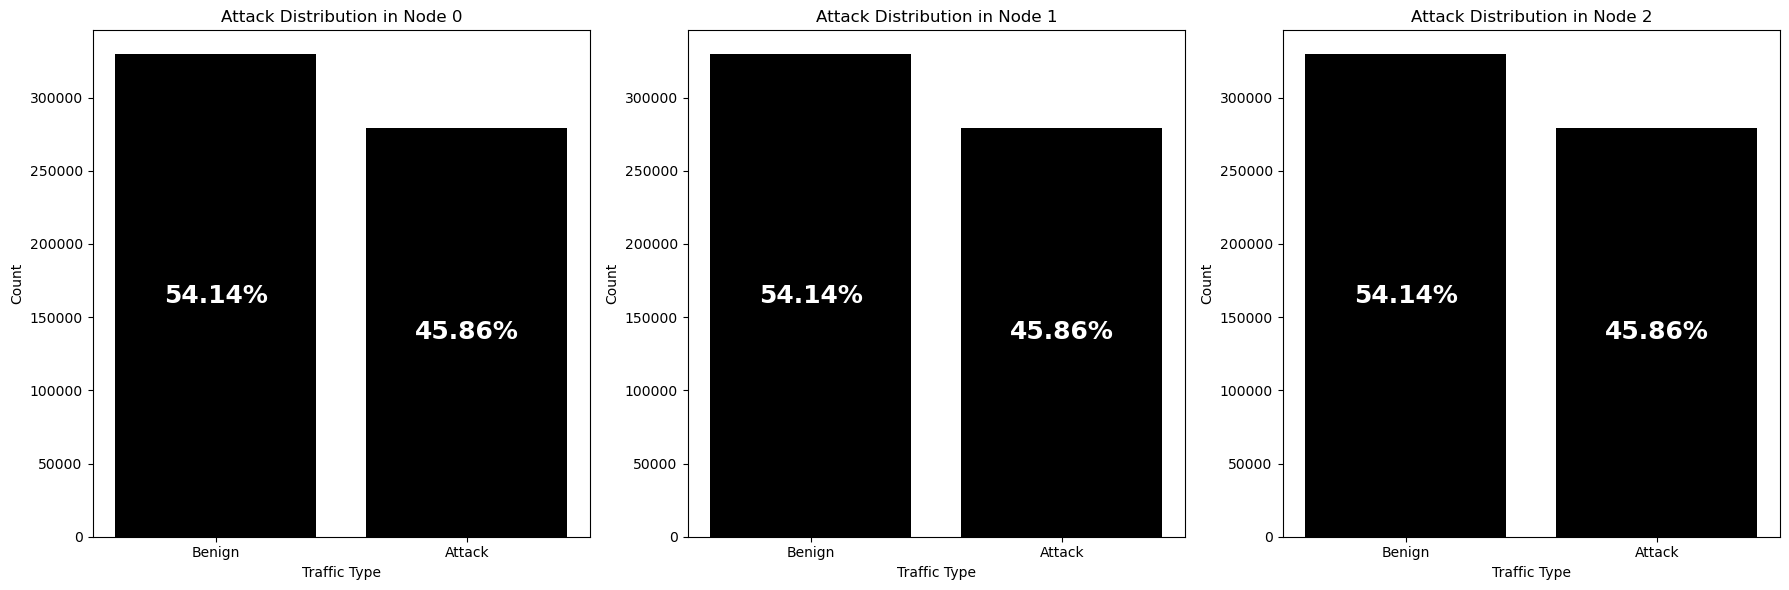

In [52]:
TrafficDistribution(partitions_eq3, nodes)

Save the partitions:

In [53]:
for i in range(nodes):
    partitions_eq3[f"part_{i}"].to_csv(f"..\\datasets\\UniformPartitions\\uniform_part{i}.csv", index=False)